Alican Akca - Izmir University of Economics

This research was conducted in order to analyse the use of fuel in relation to CO2 emissions by country. In addition, the relationship between the dataset's members has been investigated under research questions, and a broad comparison between countries has been made.

Keywords and key phrases: co2 data, co2 mm, co2 data, co2 ppm.

## Introduction

This dataset includes per Country CO2 Emissions from fuels annually since 1751 till 2014[1]. And these uses are expressed in million metric tons of the element Carbon. The analyses of the countries will be done in this notebook. Correlation graphs will be used to investigate it, and outputs will be offered for other applications. The research questions aimed to be answered in this study are:

• Are there similarities in the rate of fuel use in geographically close countries?

• What are the factors that have increased the use of emissions in countries in recent years?

• How did the increase in fuel use increase per capita carbon dioxide emissions?

Let's start with importing the data and libraries that will be used after.

In [3]:
options(warn=-1)

In [4]:
library("ggplot2")
library("cowplot")
library("reshape2")
dataset = read.csv(file = "fossil-fuel-co2-emissions-by-nation.csv",header = TRUE,
                   sep = ",")
dataset = data.frame(dataset, check.rows = TRUE)

In [5]:
any(dataset=="." | dataset=="_" | dataset=="-" | dataset=="!" 
   |dataset== "?"| dataset== " "| dataset== "")

[1] FALSE

In [6]:
header <-  list('Year', 'Country', 'Total', 'Solid Fuel', 'Liquid Fuel',
          'Gas Fuel', 'Cement', 'Gas Flaring', 'Per Capita', 'Bunker Fuels')

colnames(dataset) <- header

And then, I also realized that the items are listed in years. Let's reorder the countries by their names. The years each country has will be displayed under its own name.

## General Information



This chunk of data contains data from 256 countries. Some major countries and kingdoms have about 300 years of data, the rest have 100-150 years of data. Data are sourced from the US Government's Earth System Research Laboratory, Global Monitoring Division. According to the source, data is reported as a mole fraction of dry air, defined as the number of carbon dioxide molecules divided by the number of all molecules in the air, including the CO2 itself, after water vapor has been removed. The mole fraction is expressed as parts per million (ppm). Let's start analyzing with Data Types.

Now I want to share Data Types of Items. "Total","Solid.Fuel","Liquid Fuel","Bunker fuels","Per Capita","Gas Flaring","Cement","Gas Fuel" are the Numerical, Continuous and Ratio Ones. Additionally, "Year" and "Country" are Categorical, "Year" is a Discrete and Interval, "Countries" is a Nominal. Finally, I want to mention that there is no "Ordinal" Data Type.

# Data Analysis

### Correlations

The correlations of the columns will be checked except the Country column due to the data type.

We are calculating correlations between numerical values.

In [7]:
cor4plot <- round(cor(cbind(dataset[1],dataset[3:10])),2)

We delete the top of the correlation chart for visualization.

In [8]:
get_lower_tri <- function(cormat){
    cormat[upper.tri(cormat)]<- NA
    return(cormat)}

cor4plot <- get_lower_tri(cor4plot)

In [9]:
melted_cor <- melt(cor4plot, na.rm = TRUE)

In [10]:
df4cor <- data.frame(row=rownames(melted_cor)[row(melted_cor)], 
                     col=colnames(melted_cor)[col(melted_cor)], 
                     corr=c(melted_cor))

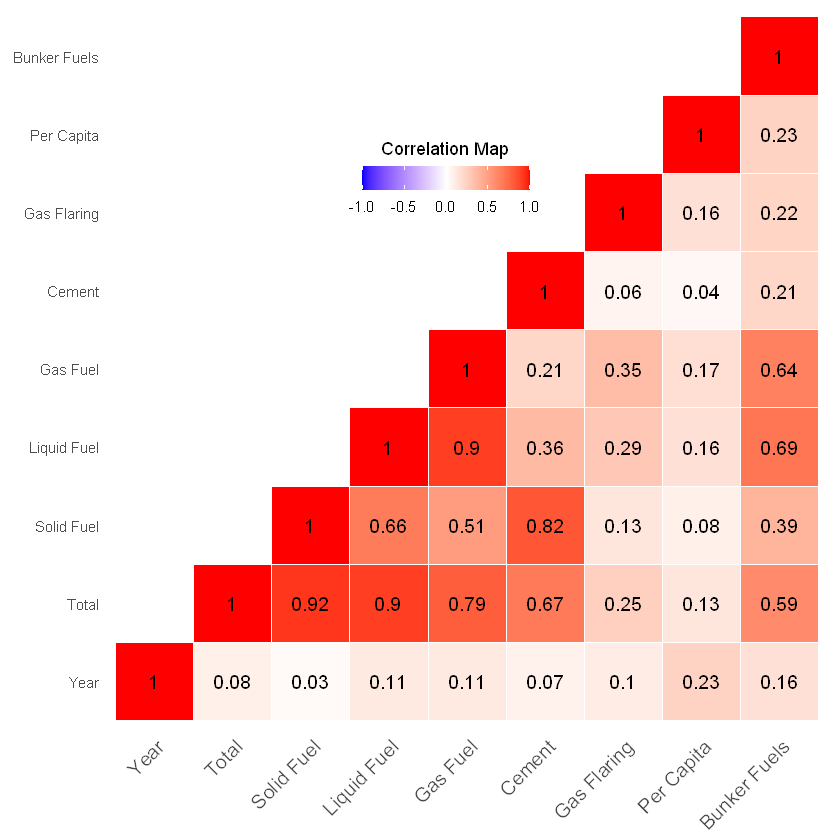

In [11]:
ggheatmap <- ggplot(data = melted_cor, aes(x=Var1, y=Var2, fill=value)) +
      geom_tile(color = "white") +
      scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
      midpoint = 0, limit = c(-1,1), space = "Lab", name ="Correlation Map")+
      theme_minimal()+ 
      theme(axis.text.x= element_text(angle= 45, vjust= 1,size= 12,hjust= 1))+
      coord_fixed()

ggheatmap + 
      geom_text(aes(Var1, Var2, label = value), color = "black", size = 4) +
      theme(axis.title.x = element_blank(), axis.title.y = element_blank(),
            panel.grid.major = element_blank(),panel.border = element_blank(),
            panel.background = element_blank(),axis.ticks = element_blank(),
            legend.justification = c(1, 0),legend.position = c(0.6, 0.7),
            legend.direction = "horizontal")+
            guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                                         title.position = "top", 
                                         title.hjust = 0.5))

## Evaluation

As you can expect, factors such as Solid Fuel, Liquid Fuel, Gas Fuel, Cement, Bunker Fuels have all had an impact on total carbon emissions. Firstly, I want you to point out to the Gas Flaring section. According to the Turkish National Committee of the World Energy Council, the reason for the weakness of the effect of gas combustion on total carbon emissions is the carbon capture and storage systems used in the chimneys of the factories[2]. From here, we see the reason for the weakness we see in the correlation graph.

Secondly, please draw attention to Solid Fuel and Cement. Although it is thought that it is not a complete relationship with a rough look, It has been stated by experts that the use of solid fuels as an alternative fuel for cement production has increased in recent years[3].

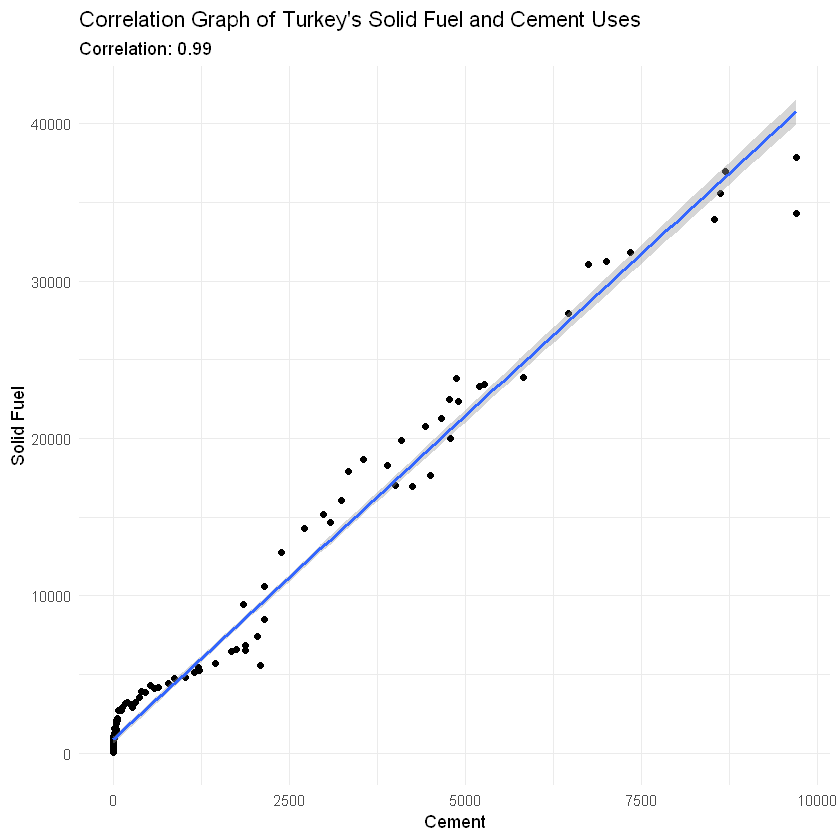

In [12]:
x = dataset$Cement[which(dataset["Country"] == "TURKEY")]
y = dataset$`Solid Fuel`[which(dataset["Country"] == "TURKEY")]

data <- data.frame(cement=x,solidfuel=y)
plot <- ggplot(data, aes(x=cement,y=solidfuel), col = "lightblue") + 
        geom_point() +geom_smooth(formula = y ~ x, method = "lm")+
        ggtitle("Correlation Graph of Turkey's Solid Fuel and Cement Uses",
                subtitle = paste("Correlation:", round(cor(x, y), 2)))+
        xlab("Cement")+  
        ylab("Solid Fuel")+
      theme(plot.title=element_text(color="black", size=12, face="bold",hjust=0.5),
        axis.title.x  =element_text(color="black", size=12, face="bold"),
        axis.title.y  =element_text(color="black", size=12, face="bold"))
plot + theme_minimal()

As it is seen, because there was no association forming in the opposite direction, there is no negative correlation. Now, let's look at the total fuel uses. Also, I want to specify that Carbon Dioxide Per Capita will be evaluated alone.

## Comparison of Countries

In this section, We will make a comparison of Countries to understand their carbon dioxide emission uses annually. And then, We will get into the details of the countries with similar results that We will encounter. Firstly, we starting with total uses. Let's begin by create the dataframe that has Country, Total Uses and Years for it.

In [13]:
topCountries <- function(added_cntry){
country <- c()
total <- c()
year <- c()

for (cntry in rev(unique(dataset$Country)))
    {country <- append(cntry,country)
    total <- append(
    as.numeric(sum(max(dataset$Total[which(dataset["Country"] == cntry)]),
               dataset$`Bunker Fuels`[which(dataset["Country"]==cntry)])),
              total) #So far, we have collected the data of the selected country.
                     #I want to note that, Bunker Fuels was not added to Total.
     year <- append(paste({min(dataset$Year[which(dataset["Country"] == cntry)])},
                    {max(dataset$Year[which(dataset["Country"] == cntry)])},
                    sep="-"),year)}
                    #In this section, we add in which year range the countries                         
                    #have data.
data <- data.frame(coun =country, tot = total, yr=year)
data <- data[ with(data, order(tot,decreasing = TRUE)),]
rownames(data) <- NULL
data$coun <- substring(data$coun, 0, 25)
                    #We have limited country names to 25 characters

TURKEY <- data[which(data["coun"] == added_cntry):
               which(data["coun"] == added_cntry),]
data <- rbind(data[1:20,],TURKEY)
data <- data[ with(data, order(tot,decreasing = TRUE)),]
return(data)}       #This function gave the 20 countries with the highest values 
                    #and Turkey, which is the reference country.

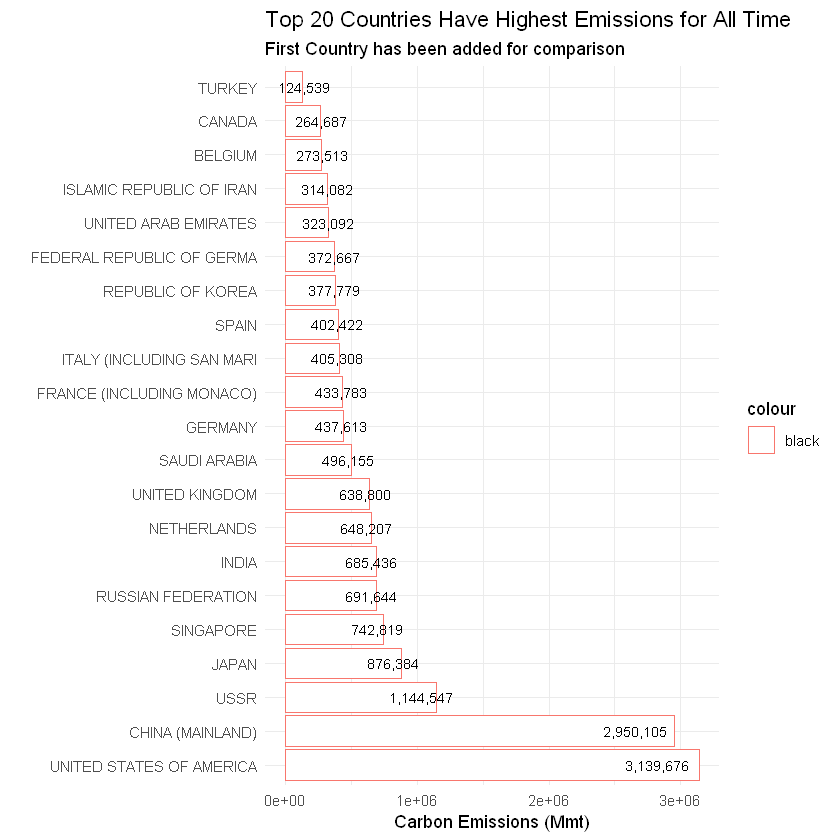

In [14]:
bar <- ggplot(topCountries("TURKEY"), 
              aes(x = tot, y = reorder(coun, -tot),color = "black")) + 
      geom_col(stat = "identity",fill = "white")+
      ggtitle("Top 20 Countries Have Highest Emissions for All Time", 
      subtitle = "First Country has been added for comparison")+
      xlab("Carbon Emissions (Mmt)")+  ylab("")+
      geom_text(aes(label=format(tot, big.mark = ",", scientific = FALSE),),
                size = 3, 
                position = position_stack(vjust = 0.9),color = "black", size=12, 
                face="bold")+
      theme(plot.title=element_text(color="black", size=12, face="bold"),
            axis.title.x  =element_text(color="black", size=12, face="bold"),
            legend.position="none")
  
bar + theme_minimal()

As you see the consequences of total fuel uses on the bar graph, SPAIN and ITALY has quite similar results as FRANCE and GERMANY have same consequences. Also, I want you to point out to the CHINA and USA. These two countries have a pretty too much uses. Now, we will compare the Fossil Fuel Usage of Turkey and Greece, as they are very close geographically. But before that I have to explain the steps.

We are going to take the arithmetic mean of countries between their years. We will use this function for other chunks. The average outputs will have plotted with the annual uses of countries.

In [15]:
avg <- c()

avgOfTotal <- function(country){
  
  min_year <- min(dataset$Year[which(dataset["Country"] == country)])
  size <- length(unique(dataset$Country))
                     #We prepared the data to compare the total use of the country                      
                     #to be compared with the average of all remaining countries.                       
  for(year in min_year:2014){
                     #We limited this to years for which the country had data.
    avg <- append(
      round(sum(dataset$Total[which(dataset["Year"] == year)])/size,2),avg)}
  
  avg <- data.frame(avgs = rev(avg),sz = rev(size))
  return(avg)}       #The dataset has been given for the years averaged.

This is the plotting section. The graph will be plotted with average of the whole countries and focused Country.

In [16]:
total_emission <- function(cntry,n){
  
  total <- dataset$Total[which(dataset["Country"] == cntry)]
                     #Two insignificant data have been found for Germany.
  if(cntry=="GERMANY"){ 
    total  <- total[total!=492]
    total  <- total[total!=353]}
  
  year_max <- max(dataset$Year[which(dataset["Country"] == cntry)])
  year_min <- min(dataset$Year[which(dataset["Country"] == cntry)])
  xlab     <- paste("Year",paste(year_min, year_max,sep="-"),sep = " ")
                     #Existing years have been kept for visualization.
  plot <- ggplot(data=data.frame(total), aes(x=1:length(total),y=total))+
      ggtitle(paste("Total CO2 Emissions Each Year Graph for",cntry,sep = " ")) +
      xlab(xlab)+  
      ylab("Carbon Emissions (Mmt)")+
      theme(plot.title=element_text(color="black", size=9, face="bold",hjust=0.5),
            axis.title.x  =element_text(color="black", size=9, face="bold"),
            axis.title.y  =element_text(color="black", size=9, face="bold"))
  
  lbl4legend <- substr(cntry,1,3)
  
  plot <- plot +     #Graph one. It's a total use of country has been choosen.
    geom_line(aes(y=total,group =1,color = lbl4legend))
  plot <- plot +     #Graph two. It's an average of the rest of the countries.
    geom_line(data=avgOfTotal(cntry)[1:length(total),], 
              aes(x=1:length(total),
                  y=avgs,group =2,
                  color = "Global Average"))
                     #Two graph will be combined. Look at below for second graph.
  plot <- plot_grid(plot, lastnyears(cntry,n,year_max), nrow = 2, labels = "AUTO")
  return(plot + theme_minimal())}

This function provides to plot the detailed uses of focused Country in the years that specified before.

In [17]:
lastnyears <- function(cntry,n,year_max){
                     #This function provides to specify detail of Countries that
COUNTRY <- cbind(    #has been choosen in last n years. N is an arbitrary number.
  dataset$`Solid Fuel`[which(dataset["Country"] == cntry)],
  dataset$`Liquid Fuel`[which(dataset["Country"] == cntry)],
  dataset$`Cement`[which(dataset["Country"] == cntry)],
  dataset$`Gas Flaring`[which(dataset["Country"] == cntry)],
  dataset$`Bunker Fuels`[which(dataset["Country"] == cntry)]) 

colnames(COUNTRY) = c("Solid Fuel",
                     "Liquid Fuel",
                     "Cement",
                     "Gas Flaring",
                     "Bunker Fuels")

COUNTRY <- data.frame(COUNTRY)
COUNTRY <- tail(COUNTRY, n =n)
                     #The tail() function provides thi↑s.
xlab     <- paste("Year",paste(year_max-n, year_max,sep="-"),sep = " ")

plot <- ggplot(data=COUNTRY, aes(1:n))  +  
    geom_line(aes(y = Solid.Fuel, color = "Solid Fuel"))+
    geom_line(aes(y = Liquid.Fuel, color = "Liquid Fuel"))+  
    geom_line(aes(y = Cement, color = "Cement"))+
    geom_line(aes(y = Gas.Flaring, color = "Gas Flaring"))+
    geom_line(aes(y = Bunker.Fuels, color = "Bunker Fuels"))+
    ggtitle(paste("Factors Affecting Emissions of",cntry,sep = " ")) +
    xlab(xlab)+ ylab("Carbon Emissions (Mmt)")+
    theme(plot.title=element_text(color="black", size=9, face="bold",hjust=0.5),
          axis.title.x  =element_text(color="black", size=9, face="bold"),
          axis.title.y  =element_text(color="black", size=9, face="bold"))
    
return(plot+ theme_minimal())}

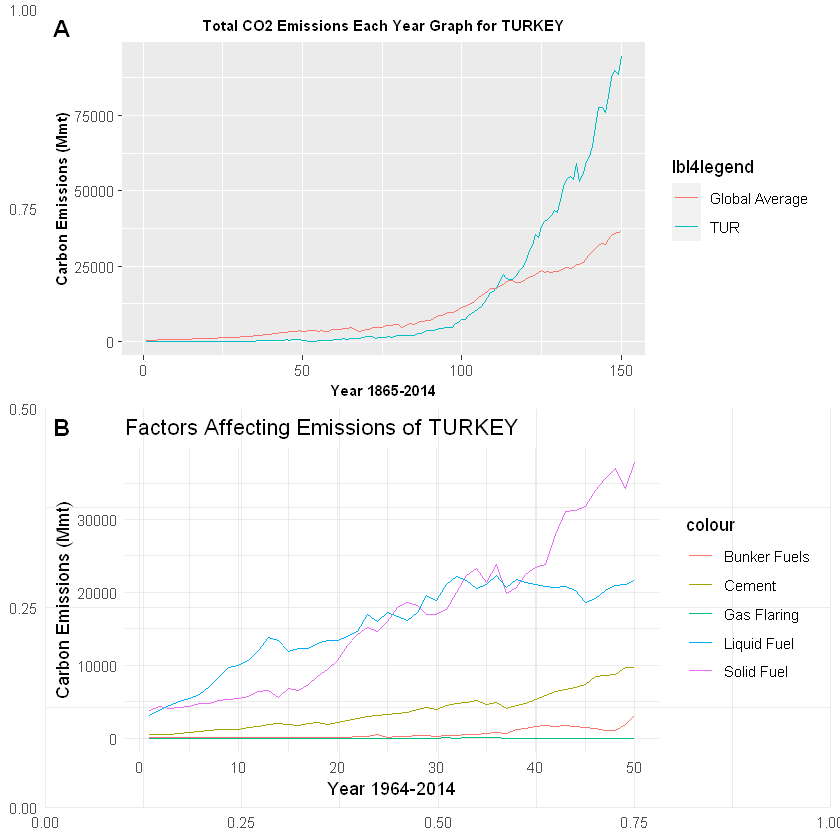

In [18]:
total_emission("TURKEY",50)

The data distribution of Turkey, has an increased tendency in the years specified. Despite the fact that, annual emissions are below the global average. On the other hand, the annual global average has also entered an upward trend. If we look at the second graph, we will see that the use of Solid Fuel and Liquid Fuel have especially increased in the recent years. Also, the use of the increase in cement use or production has also had an impact on this trend too.

Now, I want you to draw attention to annual carbon dioxide emissions of GREECE. Because I mentioned earlier that these countries will be compared due to their geographical proximity.

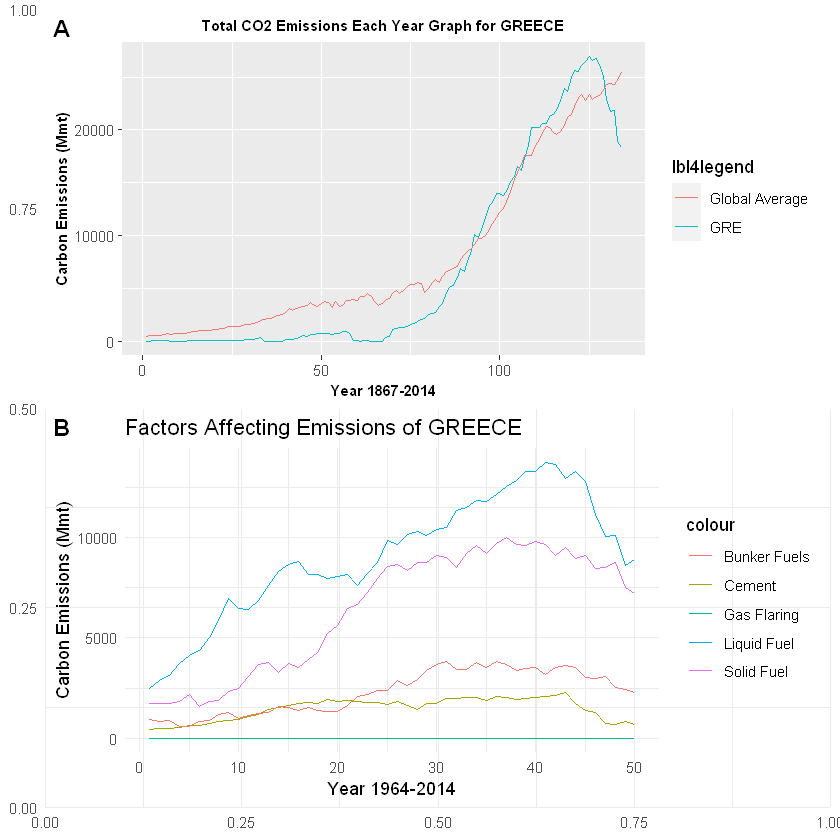

In [19]:
total_emission("GREECE",50)

Despite the fact that Greece's annual emissions are lower than Turkey's, Turkey's emission trend is slightly different from Greece's in the recent years. We can observe that the emission trend has changed direction in the last 10 years. Let's check out the second graph for the reason of that with visualization. In these years, the use of Liquid Fuel,Solid Fuel, Cement, Bunker Fuels have been reduced.

Now we are going to look at fuel use per capita. Turkey has been used to make this comparison. You can compare the country you want by giving arguments to the function as before.

In [20]:
avg <- c()

avgOfPerCapita <- function(lowestYear){
  
  size <- length(unique(dataset$Country))

  for(year in lowestYear:2014){
                     #We limited this to years for which the country had data.
    avg <- append(
      round(sum(dataset$`Per Capita`[which(dataset["Year"] == year)])/size,2),avg)}
  lowestYear
  avg <- data.frame(avgs = rev(avg),sz = rev(size))
  
  return(avg)}       #The dataset has been given for the years averaged.

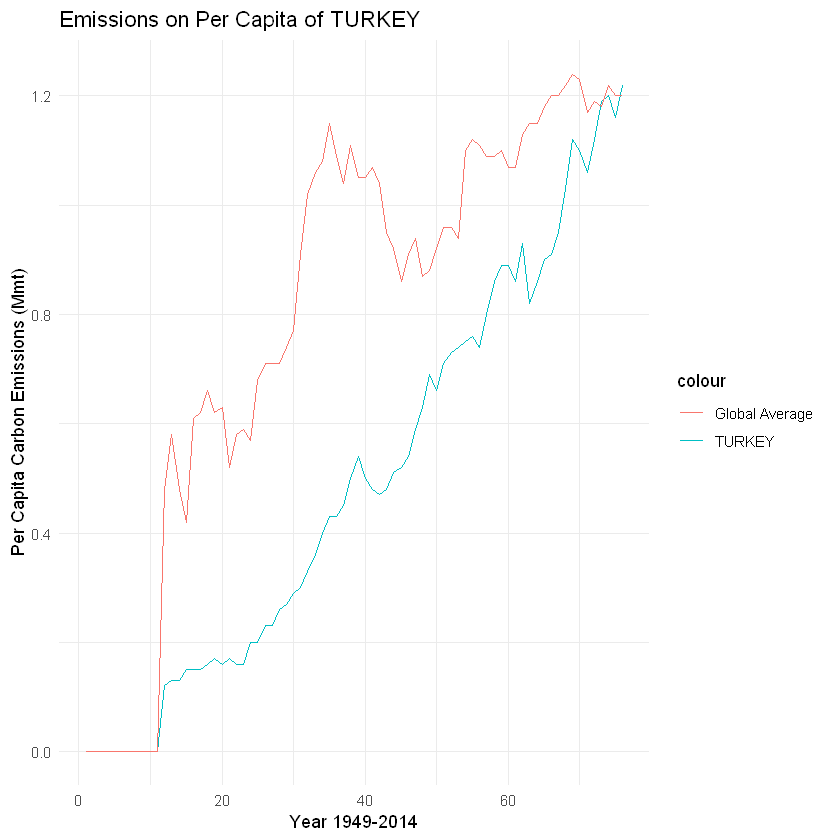

In [23]:
perCapita <- function(country){#Emission data per capita began to be 
  data <-data.frame(           #taken after 1949.
  c1=dataset$`Per Capita`[which(dataset["Country"] == country)][75:150],
  c2=dataset$Year[which(dataset["Country"] == country)][75:150],
  c3=avgOfPerCapita(1865)$avgs[75:150])

  xlab<- paste("Year",paste(1949, 2014,sep="-"),sep = " ")
    plot <- ggplot(data)+geom_line(aes(x=1:76,y=c1, color = "TURKEY"))+
          geom_line(aes(x=1:76,y=c3,group =2, color = "Global Average"))+
          ggtitle(paste("Emissions on Per Capita of",country,sep = " " )) +
          xlab(xlab)+ ylab("Per Capita Carbon Emissions (Mmt)")+
          theme(plot.title=element_text(
            color="black", size=9, face="bold",hjust=0.5),
          axis.title.x =element_text(color="black", size=9, face="bold"),
          axis.title.y =element_text(color="black", size=9, face="bold"))
return(plot + theme_minimal())}

perCapita("TURKEY")

We have seen that emissions per capita are below the global average. But this increased trend is higher than the global average in the recent years.

Consequently, We deduce that although the main fuels used are similar in geographically close countries, the usage trend may be different. Also, while the world average of emissions per capita has passed a stagnant trend, it has been observed that Turkey is in an increasing trend.

## Citations and References

[1] Boden, T.A., G. Marland, and R.J. Andres. 2013. Global, Regional, and National Fossil-Fuel CO2 Emissions. Carbon Dioxide Information Analysis Center, Oak Ridge National Laboratory, U.S. Department of Energy, Oak Ridge, Tenn., U.S.A. doi 10.3334/CDIAC/00001_V2013

[2] World Energy Council Turkish National Committee (February 2018)

[3][Prof. Dr. H. Yılmaz ARUNTAS, Turkiye Cimento Sektorunde Alternatif Yakit Kullanimi](https://cementurk.com.tr/turk-cimento-sektorunde-alternatif-yakit-kullanimi/)